# Pre-Req:

In [27]:
#Project Imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler


In [2]:
#Train Dataset
TrainDataset = pd.read_csv('/content/train.csv')
TrainDataset.head()

<ipython-input-2-a0e7fe7c84d3>:2: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  TrainDataset = pd.read_csv('/content/train.csv')


,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [3]:
TrainDataset.shape

(121180, 508)

In [4]:
#Test Dataset
TestDataset = pd.read_csv('/content/test.csv')
TestDataset.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
0,p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk
2,p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
TestDataset.shape

(3644, 507)


#Data Clean-up:

**Train Clean-up:**

In [6]:
#Let's check what columns there are and what we can remove

# List all column names
pd.set_option('display.max_columns', None) #Sets pandas to show ALL
column_names = list(TrainDataset.columns)
print(column_names)

['id', 'p_num', 'time', 'bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40', 'bg-5:35', 'bg-5:30', 'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10', 'bg-5:05', 'bg-5:00', 'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40', 'bg-4:35', 'bg-4:30', 'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10', 'bg-4:05', 'bg-4:00', 'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40', 'bg-3:35', 'bg-3:30', 'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10', 'bg-3:05', 'bg-3:00', 'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40', 'bg-2:35', 'bg-2:30', 'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10', 'bg-2:05', 'bg-2:00', 'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40', 'bg-1:35', 'bg-1:30', 'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10', 'bg-1:05', 'bg-1:00', 'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40', 'bg-0:35', 'bg-0:30', 'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10', 'bg-0:05', 'bg-0:00', 'insulin-5:55', 'insulin-5:50', 'insulin-5:45', 'insulin-5:40', 'insulin-5:35', 'insulin-5:30', 'insulin-5:25', 'insulin-5:20', 'insulin-5:15', 'insulin-5:10', 'insulin-5:05', 'insulin

In [7]:
#Removal of the activity columns and replacing it with just 1 column

# List of columns to check
activity_columns = [
    'activity-5:55', 'activity-5:50', 'activity-5:45', 'activity-5:40', 'activity-5:35', 'activity-5:30',
    'activity-5:25', 'activity-5:20', 'activity-5:15', 'activity-5:10', 'activity-5:05', 'activity-5:00',
    'activity-4:55', 'activity-4:50', 'activity-4:45', 'activity-4:40', 'activity-4:35', 'activity-4:30',
    'activity-4:25', 'activity-4:20', 'activity-4:15', 'activity-4:10', 'activity-4:05', 'activity-4:00',
    'activity-3:55', 'activity-3:50', 'activity-3:45', 'activity-3:40', 'activity-3:35', 'activity-3:30',
    'activity-3:25', 'activity-3:20', 'activity-3:15', 'activity-3:10', 'activity-3:05', 'activity-3:00',
    'activity-2:55', 'activity-2:50', 'activity-2:45', 'activity-2:40', 'activity-2:35', 'activity-2:30',
    'activity-2:25', 'activity-2:20', 'activity-2:15', 'activity-2:10', 'activity-2:05', 'activity-2:00',
    'activity-1:55', 'activity-1:50', 'activity-1:45', 'activity-1:40', 'activity-1:35', 'activity-1:30',
    'activity-1:25', 'activity-1:20', 'activity-1:15', 'activity-1:10', 'activity-1:05', 'activity-1:00',
    'activity-0:55', 'activity-0:50', 'activity-0:45', 'activity-0:40', 'activity-0:35', 'activity-0:30',
    'activity-0:25', 'activity-0:20', 'activity-0:15', 'activity-0:10', 'activity-0:05', 'activity-0:00'
]

# Create a new column 'activity' with the first non-null value found in specified columns
TrainDataset['activity'] = TrainDataset[activity_columns].bfill(axis=1).iloc[:, 0]
TrainDataset['activity'].fillna("No activity", inplace=True)

# Drop the original activity columns
TrainDataset.drop(columns=activity_columns, inplace=True)

print(TrainDataset.head())

<ipython-input-7-f9751e367118>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  TrainDataset['activity'].fillna("No activity", inplace=True)


      id p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  \
0  p01_0   p01  06:10:00      NaN      NaN      9.6      NaN      NaN   
1  p01_1   p01  06:25:00      NaN      NaN      9.7      NaN      NaN   
2  p01_2   p01  06:40:00      NaN      NaN      9.2      NaN      NaN   
3  p01_3   p01  06:55:00      NaN      NaN      8.7      NaN      NaN   
4  p01_4   p01  07:10:00      NaN      NaN      8.4      NaN      NaN   

   bg-5:30  bg-5:25  bg-5:20  bg-5:15  bg-5:10  bg-5:05  bg-5:00  bg-4:55  \
0      9.7      NaN      NaN      9.2      NaN      NaN      8.7      NaN   
1      9.2      NaN      NaN      8.7      NaN      NaN      8.4      NaN   
2      8.7      NaN      NaN      8.4      NaN      NaN      8.1      NaN   
3      8.4      NaN      NaN      8.1      NaN      NaN      8.3      NaN   
4      8.1      NaN      NaN      8.3      NaN      NaN      9.6      NaN   

   bg-4:50  bg-4:45  bg-4:40  bg-4:35  bg-4:30  bg-4:25  bg-4:20  bg-4:15  \
0      NaN      8.4  

In [8]:
#Cleaning of Train dataset:

##########################################ID
TrainDataset['id'] = TrainDataset['id'].str.replace('p', '').str.replace('_', '').astype(int)

#########################################p_num
TrainDataset['p_num'] = TrainDataset['p_num'].str.replace('p', '').astype(int)

#########################################Time
#Replace the values in the 'time' column by removing colons and converting to integers
TrainDataset['time'] = TrainDataset['time'].str.replace(":", "").astype(int)

########################################The Rest
# Select only the numeric columns starting from the 4th column onward
numeric_cols = TrainDataset.iloc[:, 3:].select_dtypes(include=['float', 'int']).columns

# Apply lambda function to fill NaNs with the row-wise mean in the numeric columns
TrainDataset[numeric_cols] = TrainDataset[numeric_cols].apply(lambda row: row.fillna(row.mean()), axis=1)

#Mapping categorical values to numeric
activity_mapping = {
    'Indoor climbing': 1,
    'Run': 2,
    'Strength training': 3,
    'Swim': 4,
    'Bike': 5,
    'Dancing': 6,
    'Stairclimber': 7,
    'Spinning': 8,
    'Walking': 9,
    'HIIT': 10,
    'Outdoor Bike': 11,
    'Walk': 12,
    'Aerobic Workout': 13,
    'Tennis': 14,
    'Workout': 15,
    'Hike': 16,
    'Zumba': 17,
    'Sport': 18,
    'Yoga': 19,
    'Swimming': 20,
    'Weights': 21,
    'Running': 22
}

# Find columns that start with 'activity'
activity_columns = [col for col in TrainDataset.columns if col.startswith('activity')]

# Map the categorical values to numerical ones for these columns and fill NaNs with 23 (No activity)
for col in activity_columns:
    TrainDataset[col] = TrainDataset[col].map(activity_mapping).fillna(23)



#Example output
print(TrainDataset)


             id  p_num    time   bg-5:55   bg-5:50  bg-5:45   bg-5:40  \
0            10      1   61000  3.458396  3.458396      9.6  3.458396   
1            11      1   62500  3.502728  3.502728      9.7  3.502728   
2            12      1   64000  3.574895  3.574895      9.2  3.574895   
3            13      1   65500  3.616134  3.616134      8.7  3.616134   
4            14      1   71000  3.643971  3.643971      8.4  3.643971   
...         ...    ...     ...       ...       ...      ...       ...   
121175  1019459     10  172000  4.800000  4.700000      4.6  4.500000   
121176  1019460     10  172500  4.700000  4.600000      4.5  4.400000   
121177  1019461     10  173000  4.600000  4.500000      4.4  4.500000   
121178  1019462     10  173500  4.500000  4.400000      4.5  4.700000   
121179  1019463     10  174000  4.400000  4.500000      4.7  4.900000   

         bg-5:35  bg-5:30   bg-5:25   bg-5:20  bg-5:15   bg-5:10   bg-5:05  \
0       3.458396      9.7  3.458396  3.458396

**Test Clean-up:**

In [9]:
#Removal of the activity columns and replacing it with just 1 column

# List of columns to check
activity_columns = [
    'activity-5:55', 'activity-5:50', 'activity-5:45', 'activity-5:40', 'activity-5:35', 'activity-5:30',
    'activity-5:25', 'activity-5:20', 'activity-5:15', 'activity-5:10', 'activity-5:05', 'activity-5:00',
    'activity-4:55', 'activity-4:50', 'activity-4:45', 'activity-4:40', 'activity-4:35', 'activity-4:30',
    'activity-4:25', 'activity-4:20', 'activity-4:15', 'activity-4:10', 'activity-4:05', 'activity-4:00',
    'activity-3:55', 'activity-3:50', 'activity-3:45', 'activity-3:40', 'activity-3:35', 'activity-3:30',
    'activity-3:25', 'activity-3:20', 'activity-3:15', 'activity-3:10', 'activity-3:05', 'activity-3:00',
    'activity-2:55', 'activity-2:50', 'activity-2:45', 'activity-2:40', 'activity-2:35', 'activity-2:30',
    'activity-2:25', 'activity-2:20', 'activity-2:15', 'activity-2:10', 'activity-2:05', 'activity-2:00',
    'activity-1:55', 'activity-1:50', 'activity-1:45', 'activity-1:40', 'activity-1:35', 'activity-1:30',
    'activity-1:25', 'activity-1:20', 'activity-1:15', 'activity-1:10', 'activity-1:05', 'activity-1:00',
    'activity-0:55', 'activity-0:50', 'activity-0:45', 'activity-0:40', 'activity-0:35', 'activity-0:30',
    'activity-0:25', 'activity-0:20', 'activity-0:15', 'activity-0:10', 'activity-0:05', 'activity-0:00'
]

# Create a new column 'activity' with the first non-null value found in specified columns
TestDataset['activity'] = TestDataset[activity_columns].bfill(axis=1).iloc[:, 0]
TestDataset['activity'].fillna("No activity", inplace=True)

# Drop the original activity columns
TestDataset.drop(columns=activity_columns, inplace=True)

print(TestDataset.head())

         id p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  \
0  p01_8459   p01  06:45:00      NaN      9.2      NaN      NaN     10.2   
1  p01_8460   p01  11:25:00      NaN      NaN      9.9      NaN      NaN   
2  p01_8461   p01  14:45:00      NaN      5.5      NaN      NaN      5.5   
3  p01_8462   p01  04:30:00      NaN      3.4      NaN      NaN      3.9   
4  p01_8463   p01  04:20:00      NaN      NaN      8.3      NaN      NaN   

   bg-5:30  bg-5:25  bg-5:20  bg-5:15  bg-5:10  bg-5:05  bg-5:00  bg-4:55  \
0      NaN      NaN     10.3      NaN      NaN     10.2      NaN      NaN   
1      9.4      NaN      NaN      9.1      NaN      NaN      8.3      NaN   
2      NaN      NaN      5.2      NaN      NaN      5.2      NaN      NaN   
3      NaN      NaN      4.7      NaN      NaN      4.1      NaN      NaN   
4     10.0      NaN      NaN     12.2      NaN      NaN     12.8      NaN   

   bg-4:50  bg-4:45  bg-4:40  bg-4:35  bg-4:30  bg-4:25  bg-4:20  bg-4:15  \
0  

<ipython-input-9-a5f4052e980c>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  TestDataset['activity'].fillna("No activity", inplace=True)


In [10]:
#Cleaning of Test dataset:

##########################################ID
TestDataset['id'] = TestDataset['id'].str.replace('p', '').str.replace('_', '').astype(int)

#########################################p_num
TestDataset['p_num'] = TestDataset['p_num'].str.replace('p', '').astype(int)

#########################################Time
#Replace the values in the 'time' column by removing colons and converting to integers
TestDataset['time'] = TestDataset['time'].str.replace(":", "").astype(int)

########################################The Rest
# Select only the numeric columns starting from the 4th column onward
numeric_cols = TestDataset.iloc[:, 3:].select_dtypes(include=['float', 'int']).columns

# Apply lambda function to fill NaNs with the row-wise mean in the numeric columns
TestDataset[numeric_cols] = TestDataset[numeric_cols].apply(lambda row: row.fillna(row.mean()), axis=1)

#Mapping categorical values to numeric
activity_mapping = {
    'Indoor climbing': 1,
    'Run': 2,
    'Strength training': 3,
    'Swim': 4,
    'Bike': 5,
    'Dancing': 6,
    'Stairclimber': 7,
    'Spinning': 8,
    'Walking': 9,
    'HIIT': 10,
    'Outdoor Bike': 11,
    'Walk': 12,
    'Aerobic Workout': 13,
    'Tennis': 14,
    'Workout': 15,
    'Hike': 16,
    'Zumba': 17,
    'Sport': 18,
    'Yoga': 19,
    'Swimming': 20,
    'Weights': 21,
    'Running': 22
}

# Find columns that start with 'activity'
activity_columns = [col for col in TestDataset.columns if col.startswith('activity')]

# Map the categorical values to numerical ones for these columns and fill NaNs with 23 (No activity)
for col in activity_columns:
    TestDataset[col] = TestDataset[col].map(activity_mapping).fillna(23)



#Example output
print(TestDataset)

         id  p_num    time    bg-5:55    bg-5:50    bg-5:45    bg-5:40  \
0     18459      1   64500  18.097759   9.200000  18.097759  18.097759   
1     18460      1  112500  39.764855  39.764855   9.900000  39.764855   
2     18461      1  144500  40.806299   5.500000  40.806299  40.806299   
3     18462      1   43000  20.978899   3.400000  20.978899  20.978899   
4     18463      1   42000  21.125283  21.125283   8.300000  21.125283   
...     ...    ...     ...        ...        ...        ...        ...   
3639  24256     24   64000   7.300000   7.300000   7.100000   6.700000   
3640  24257     24  123000   6.000000   6.200000   6.200000   6.200000   
3641  24258     24   34500  12.400000  12.500000  12.700000  13.100000   
3642  24259     24   61000   8.300000   8.300000   8.200000   8.200000   
3643  24260     24   31000   9.900000  10.100000  10.000000   9.900000   

        bg-5:35    bg-5:30    bg-5:25    bg-5:20    bg-5:15    bg-5:10  \
0     10.200000  18.097759  18.097759

In [11]:
#Checking for null values in test dataset
TestDataset.isnull().sum()

,0
id,0
p_num,0
time,0
bg-5:55,0
bg-5:50,0
...,...
cals-0:15,0
cals-0:10,0
cals-0:05,0
cals-0:00,0


In [12]:
#Checking for null values in train dataset
TestDataset.isnull().sum()

,0
id,0
p_num,0
time,0
bg-5:55,0
bg-5:50,0
...,...
cals-0:15,0
cals-0:10,0
cals-0:05,0
cals-0:00,0


# Data Analysis:

TrainDataset

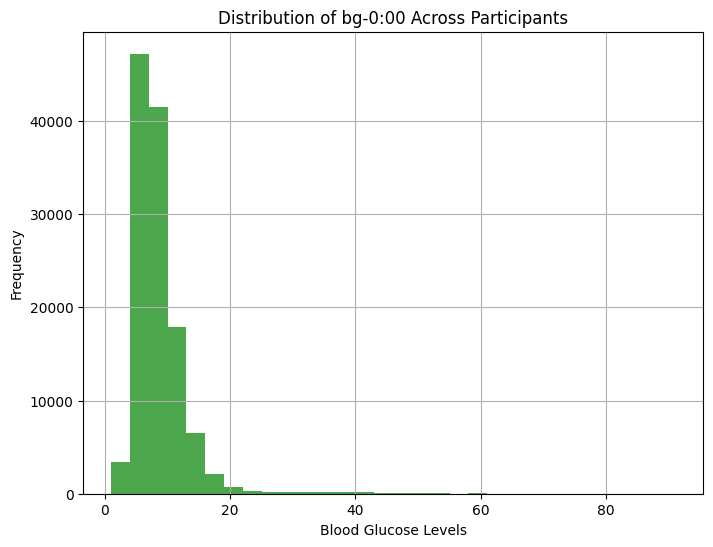

In [20]:
# Select feature and time
feature = 'bg-0:00'

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(TrainDataset[feature].dropna(), bins=30, color='green', alpha=0.7)
plt.title(f'Distribution of {feature} Across Participants')
plt.xlabel('Blood Glucose Levels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


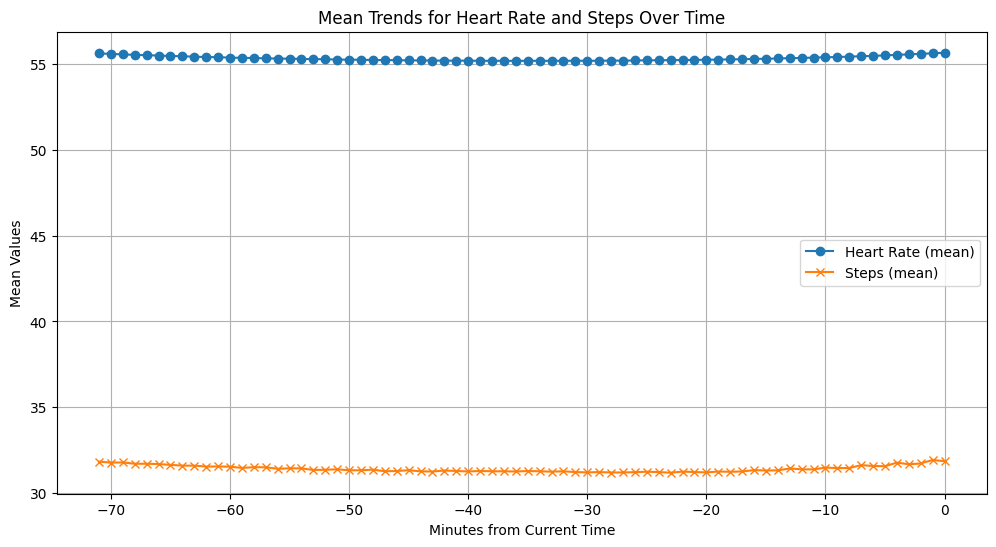

In [23]:
# Extract heart rate and steps data
hr_cols = [col for col in TrainDataset.columns if col.startswith('hr-')]
steps_cols = [col for col in TrainDataset.columns if col.startswith('steps-')]

# Calculate mean trends
mean_hr = TrainDataset[hr_cols].mean()
mean_steps = TrainDataset[steps_cols].mean()

# Time axis
time = range(-len(hr_cols) + 1, 1)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time, mean_hr, label='Heart Rate (mean)', marker='o')
plt.plot(time, mean_steps, label='Steps (mean)', marker='x')
plt.title('Mean Trends for Heart Rate and Steps Over Time')
plt.xlabel('Minutes from Current Time')
plt.ylabel('Mean Values')
plt.legend()
plt.grid(True)
plt.show()


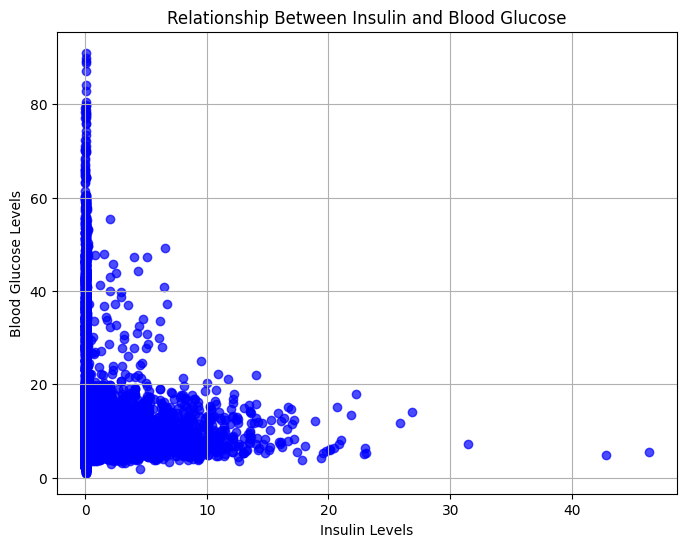

In [25]:
# Select specific time columns
time_column_bg = 'bg-0:00'
time_column_insulin = 'insulin-0:00'

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(TrainDataset[time_column_insulin], TrainDataset[time_column_bg], alpha=0.7, c='blue')
plt.title('Relationship Between Insulin and Blood Glucose')
plt.xlabel('Insulin Levels')
plt.ylabel('Blood Glucose Levels')
plt.grid(True)
plt.show()


# Machine Learning Method 1 - Random Forest:

In [ ]:
# Ensure TrainDataset and TestDataset are loaded
if 'bg+1:00' not in TrainDataset.columns:
    raise KeyError("The column 'bg+1:00' is missing from TrainDataset")

# Prepare the training features and target
X_train = TrainDataset.drop(columns=['p_num', 'time', 'bg+1:00'])
y_train = TrainDataset['bg+1:00']

# Prepare the test features without 'p_num' and 'time' columns
X_test = TestDataset.drop(columns=['p_num', 'time'], errors='ignore')

# One-Hot Encode categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Remove duplicate columns, if any, by keeping the first occurrence
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

# Reindex X_test to match X_train columns (filling missing columns with 0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Train a single RandomForest model
print("Training the model on the full training dataset...")
model = RandomForestRegressor(n_estimators=40, random_state=42)
model.fit(X_train, y_train)

# Predict 'bg+1:00' on the test set
print("Making predictions on the test dataset...")
TestDataset['bg+1:00_pred'] = model.predict(X_test)

# Calculate RMSE per ID if 'bg+1:00' is available in the test dataset for comparison
if 'bg+1:00' in TestDataset.columns:
    # Merge predicted and actual values by 'p_num'
    merged_results = TestDataset[['p_num', 'bg+1:00', 'bg+1:00_pred']]

    # Function to calculate RMSE per group (per unique p_num)
    def calculate_rmse_per_id(group):
        return np.sqrt(mean_squared_error(group['bg+1:00'], group['bg+1:00_pred']))

    # Group by 'p_num' and apply the RMSE function
    rmse_per_id = merged_results.groupby('p_num').apply(calculate_rmse_per_id).reset_index(name='RMSE')

    # Save RMSE results to a CSV file
    rmse_per_id.to_csv('rmse_per_id_results.csv', index=False)
    print("RMSE results per ID have been saved to 'rmse_per_id_results.csv'")
else:
    print("TestDataset does not contain 'bg+1:00', so RMSE calculation is not possible. Only predictions were saved.")

# Prepare submission file with ID and predicted 'bg+1:00' values
print("Preparing submission file...")
submission_data = TestDataset[['p_num', 'bg+1:00_pred']].copy()
submission_data['id'] = submission_data.index  # Creates a unique identifier for each row if ID is not present
submission_data = submission_data.rename(columns={'bg+1:00_pred': 'bg+1:00'})
submission_data.to_csv('kaggle_submission.csv', index=False)
print("Kaggle submission file has been saved to 'kaggle_submission.csv'")

Training the model on the full training dataset...
Making predictions on the test dataset...
TestDataset does not contain 'bg+1:00', so RMSE calculation is not possible. Only predictions were saved.
Preparing submission file...
Kaggle submission file has been saved to 'kaggle_submission.csv'


In [ ]:
# Load the data
LearnedData = pd.read_csv('/content/kaggle_submission.csv')

# Create the new 'id' column by formatting p_num and concatenating with id
LearnedData['ID'] = LearnedData.apply(lambda row: f"p{'0' if int(row['p_num']) < 10 else ''}{int(row['p_num'])}_{int(row['id'])}", axis=1)

# Drop the original 'p_num' and 'id' columns
LearnedData.drop(columns=['p_num', 'id'], inplace=True)

# Reorder the columns to make 'id' the first column
cols = ['ID'] + [col for col in LearnedData.columns if col != 'ID']
LearnedData = LearnedData[cols]

# Save the updated dataframe to CSV
LearnedData.to_csv('Kaggle_Formatted_LoganB_RF_Method1 V3.0.csv', index=False)

# Display the first few rows of the updated dataframe
print(LearnedData.head())

      ID  bg+1:00
0  p01_0   9.0800
1  p01_1   6.0775
2  p01_2   8.0450
3  p01_3  10.7650
4  p01_4   6.8450


#Machine Learning Method 2 - Neural Network:

In [ ]:
# Ensure TrainDataset and TestDataset are loaded
if 'bg+1:00' not in TrainDataset.columns:
    raise KeyError("The column 'bg+1:00' is missing from TrainDataset")

# Prepare the training features and target
X_train = TrainDataset.drop(columns=['p_num', 'time', 'bg+1:00'])
y_train = TrainDataset['bg+1:00']

# Prepare the test features without 'p_num' and 'time' columns
X_test = TestDataset.drop(columns=['p_num', 'time'], errors='ignore')

# One-Hot Encode categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Remove duplicate columns, if any, by keeping the first occurrence
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

# Reindex X_test to match X_train columns (filling missing columns with 0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the neural network model
print("Building the neural network model...")
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_split.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
print("Training the model on the full training dataset...")
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Predict 'bg+1:00' on the test set
print("Making predictions on the test dataset...")
TestDataset['bg+1:00_pred'] = model.predict(X_test).flatten()

# Calculate RMSE per ID if 'bg+1:00' is available in the test dataset for comparison
if 'bg+1:00' in TestDataset.columns:
    # Merge predicted and actual values by 'p_num'
    merged_results = TestDataset[['p_num', 'bg+1:00', 'bg+1:00_pred']]

    # Function to calculate RMSE per group (per unique p_num)
    def calculate_rmse_per_id(group):
        return np.sqrt(mean_squared_error(group['bg+1:00'], group['bg+1:00_pred']))

    # Group by 'p_num' and apply the RMSE function
    rmse_per_id = merged_results.groupby('p_num').apply(calculate_rmse_per_id).reset_index(name='RMSE')

    # Save RMSE results to a CSV file
    rmse_per_id.to_csv('rmse_per_id_results_nn.csv', index=False)
    print("RMSE results per ID have been saved to 'rmse_per_id_results_nn.csv'")
else:
    print("TestDataset does not contain 'bg+1:00', so RMSE calculation is not possible. Only predictions were saved.")

# Prepare submission file with ID and predicted 'bg+1:00' values
print("Preparing submission file...")
submission_data = TestDataset[['p_num', 'bg+1:00_pred']].copy()
submission_data['id'] = submission_data.index  # Creates a unique identifier for each row if ID is not present
submission_data = submission_data.rename(columns={'bg+1:00_pred': 'bg+1:00'})
submission_data.to_csv('kaggle_submission_nn.csv', index=False)
print("Kaggle submission file has been saved to 'kaggle_submission_nn.csv'")

# Load the data for post-processing
LearnedData = pd.read_csv('kaggle_submission_nn.csv')

# Create the new 'id' column by formatting p_num and concatenating with id
LearnedData['ID'] = LearnedData.apply(lambda row: f"p{'0' if int(row['p_num']) < 10 else ''}{int(row['p_num'])}_{int(row['id'])}", axis=1)

# Drop the original 'p_num' and 'id' columns
LearnedData.drop(columns=['p_num', 'id'], inplace=True)

# Reorder the columns to make 'id' the first column
cols = ['ID'] + [col for col in LearnedData.columns if col != 'ID']
LearnedData = LearnedData[cols]

# Save the updated dataframe to CSV
LearnedData.to_csv('Kaggle_Formatted_LoganB_NN_Method1_V1.0.csv', index=False)

# Display the first few rows of the updated dataframe
print(LearnedData.head())


Building the neural network model...
Training the model on the full training dataset...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 252906.9062 - mean_squared_error: 252906.9062 - val_loss: 207.8309 - val_mean_squared_error: 207.8309
Epoch 2/50
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 30161.2090 - mean_squared_error: 30161.2090 - val_loss: 51.8858 - val_mean_squared_error: 51.8858
Epoch 3/50
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 42586.8359 - mean_squared_error: 42586.8359 - val_loss: 45.5554 - val_mean_squared_error: 45.5554
Epoch 4/50
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 40.0220 - mean_squared_error: 40.0220 - val_loss: 47.2546 - val_mean_squared_error: 47.2546
Epoch 5/50
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 1819.2740 - mean_squared_error: 1819.2740 - val_loss: 179.5427 - val_mean_squared_error: 179.5427
Epoch 6/50
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 7579.5352 - mean_squared_error: 7579.5352 - val_loss: 1688.6531 - val_mean_squared_error: 1688.6531
Epoch 7/50
2975/2975 ━━━━━━━━━━━━━

<ipython-input-12-12b0167ec4a9>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TestDataset['bg+1:00_pred'] = model.predict(X_test).flatten()


#Machine Learning Method 3 - Gradient Boosting Model (XGBoost):

In [13]:
pip install --upgrade xgboost


In [14]:
# Ensure TrainDataset and TestDataset are loaded
if 'bg+1:00' not in TrainDataset.columns:
    raise KeyError("The column 'bg+1:00' is missing from TrainDataset")

# Prepare the training features and target
X_train = TrainDataset.drop(columns=['p_num', 'time', 'bg+1:00'])
y_train = TrainDataset['bg+1:00']

# Prepare the test features without 'p_num' and 'time' columns
X_test = TestDataset.drop(columns=['p_num', 'time'], errors='ignore')

# One-Hot Encode categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Remove duplicate columns, if any, by keeping the first occurrence
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

# Reindex X_test to match X_train columns (filling missing columns with 0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check XGBoost version compatibility
try:
    # Using XGBRegressor with early stopping for newer versions of XGBoost
    print("Building the XGBoost model...")
    model = XGBRegressor(
        n_estimators=120,
        learning_rate=0.2,
        max_depth=6,
        random_state=42
    )

    # Train the model
    print("Training the model on the full training dataset...")
    model.fit(
        X_train_split, y_train_split,
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=10,
        verbose=True
    )

    # Predict 'bg+1:00' on the test set
    print("Making predictions on the test dataset...")
    TestDataset['bg+1:00_pred'] = model.predict(X_test)

except TypeError:
    # Using DMatrix and train() for older versions of XGBoost
    print("Falling back to DMatrix and train() method for older XGBoost versions...")

    # Convert training and validation datasets into DMatrix format
    dtrain = DMatrix(X_train_split, label=y_train_split)
    dval = DMatrix(X_val, label=y_val)
    dtest = DMatrix(X_test)

    # Set parameters for XGBoost
    params = {
        'objective': 'reg:squarederror',
        'learning_rate': 0.2,
        'max_depth': 6,
        'seed': 42
    }

    # Train the model with early stopping
    model = train(
        params,
        dtrain,
        num_boost_round=75,
        evals=[(dtrain, 'train'), (dval, 'eval')],
        early_stopping_rounds=10
    )

    # Make predictions
    TestDataset['bg+1:00_pred'] = model.predict(dtest)

# Calculate RMSE per ID if 'bg+1:00' is available in the test dataset for comparison
if 'bg+1:00' in TestDataset.columns:
    # Merge predicted and actual values by 'p_num'
    merged_results = TestDataset[['p_num', 'bg+1:00', 'bg+1:00_pred']]

    # Function to calculate RMSE per group (per unique p_num)
    def calculate_rmse_per_id(group):
        return np.sqrt(mean_squared_error(group['bg+1:00'], group['bg+1:00_pred']))

    # Group by 'p_num' and apply the RMSE function
    rmse_per_id = merged_results.groupby('p_num').apply(calculate_rmse_per_id).reset_index(name='RMSE')

    # Save RMSE results to a CSV file
    rmse_per_id.to_csv('rmse_per_id_results_xgb.csv', index=False)
    print("RMSE results per ID have been saved to 'rmse_per_id_results_xgb.csv'")
else:
    print("TestDataset does not contain 'bg+1:00', so RMSE calculation is not possible. Only predictions were saved.")

# Prepare submission file with ID and predicted 'bg+1:00' values
print("Preparing submission file...")
submission_data = TestDataset[['p_num', 'bg+1:00_pred']].copy()
submission_data['id'] = submission_data.index  # Creates a unique identifier for each row if ID is not present
submission_data = submission_data.rename(columns={'bg+1:00_pred': 'bg+1:00'})
submission_data.to_csv('kaggle_submission_xgb.csv', index=False)
print("Kaggle submission file has been saved to 'kaggle_submission_xgb.csv'")

# Load the data for post-processing
LearnedData = pd.read_csv('kaggle_submission_xgb.csv')

# Create the new 'id' column by formatting p_num and concatenating with id
LearnedData['ID'] = LearnedData.apply(lambda row: f"p{'0' if int(row['p_num']) < 10 else ''}{int(row['p_num'])}_{int(row['id'])}", axis=1)

# Drop the original 'p_num' and 'id' columns
LearnedData.drop(columns=['p_num', 'id'], inplace=True)

# Reorder the columns to make 'id' the first column
cols = ['ID'] + [col for col in LearnedData.columns if col != 'ID']
LearnedData = LearnedData[cols]

# Save the updated dataframe to CSV
LearnedData.to_csv('Kaggle_Formatted_LoganB_XGB_Method1_V2.0.csv', index=False)

# Display the first few rows of the updated dataframe
print(LearnedData.head())


Building the XGBoost model...
Training the model on the full training dataset...
Falling back to DMatrix and train() method for older XGBoost versions...
[0]	train-rmse:2.72192	eval-rmse:2.73304
[1]	train-rmse:2.49057	eval-rmse:2.51759
[2]	train-rmse:2.32130	eval-rmse:2.36425
[3]	train-rmse:2.19788	eval-rmse:2.25565
[4]	train-rmse:2.10525	eval-rmse:2.17940
[5]	train-rmse:2.03446	eval-rmse:2.12366
[6]	train-rmse:1.97531	eval-rmse:2.07911
[7]	train-rmse:1.93300	eval-rmse:2.04820
[8]	train-rmse:1.89371	eval-rmse:2.02438
[9]	train-rmse:1.86157	eval-rmse:2.00592
[10]	train-rmse:1.83520	eval-rmse:1.98936
[11]	train-rmse:1.81259	eval-rmse:1.97789
[12]	train-rmse:1.79035	eval-rmse:1.96619
[13]	train-rmse:1.77662	eval-rmse:1.95947
[14]	train-rmse:1.76158	eval-rmse:1.95060
[15]	train-rmse:1.73919	eval-rmse:1.93835
[16]	train-rmse:1.72483	eval-rmse:1.93350
[17]	train-rmse:1.71044	eval-rmse:1.92789
[18]	train-rmse:1.69902	eval-rmse:1.92409
[19]	train-rmse:1.68426	eval-rmse:1.91598
[20]	train-rmse:

<ipython-input-14-202af805ef09>:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TestDataset['bg+1:00_pred'] = model.predict(dtest)


# Machine Learning Method 4 - Ensemble:

In [28]:
# Ensure TrainDataset and TestDataset are loaded
if 'bg+1:00' not in TrainDataset.columns:
    raise KeyError("The column 'bg+1:00' is missing from TrainDataset")

# Prepare the training features and target
X_train = TrainDataset.drop(columns=['p_num', 'time', 'bg+1:00'])
y_train = TrainDataset['bg+1:00']

# Prepare the test features without 'p_num' and 'time' columns
X_test = TestDataset.drop(columns=['p_num', 'time'], errors='ignore')

# One-Hot Encode categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Remove duplicate columns, if any, by keeping the first occurrence
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

# Reindex X_test to match X_train columns (filling missing columns with 0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train Random Forest
print("Training Random Forest...")
rf_model = RandomForestRegressor(n_estimators=40, random_state=42)
rf_model.fit(X_train_split, y_train_split)
rf_val_preds = rf_model.predict(X_val)

# Train XGBoost
print("Training XGBoost...")
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb_model.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val, y_val)],
    #early_stopping_rounds=10,
    verbose=False
)
xgb_val_preds = xgb_model.predict(X_val)

# Train Neural Network
print("Training Neural Network...")
nn_model = MLPRegressor(hidden_layer_sizes=(64, 32, 16), max_iter=500, random_state=42)
nn_model.fit(X_train_split, y_train_split)
nn_val_preds = nn_model.predict(X_val)

# Combine predictions using weighted averaging
print("Combining predictions...")
val_preds_ensemble = (0.4 * rf_val_preds) + (0.4 * xgb_val_preds) + (0.2 * nn_val_preds)

# Calculate RMSE for ensemble predictions
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds_ensemble))
print(f"Validation RMSE for ensemble: {val_rmse:.4f}")

# Predict on the test dataset using the ensemble
rf_test_preds = rf_model.predict(X_test)
xgb_test_preds = xgb_model.predict(X_test)
nn_test_preds = nn_model.predict(X_test)

TestDataset['bg+1:00_pred'] = (0.4 * rf_test_preds) + (0.4 * xgb_test_preds) + (0.2 * nn_test_preds)

# Calculate RMSE per ID if 'bg+1:00' is available in the test dataset for comparison
if 'bg+1:00' in TestDataset.columns:
    # Merge predicted and actual values by 'p_num'
    merged_results = TestDataset[['p_num', 'bg+1:00', 'bg+1:00_pred']]

    # Function to calculate RMSE per group (per unique p_num)
    def calculate_rmse_per_id(group):
        return np.sqrt(mean_squared_error(group['bg+1:00'], group['bg+1:00_pred']))

    # Group by 'p_num' and apply the RMSE function
    rmse_per_id = merged_results.groupby('p_num').apply(calculate_rmse_per_id).reset_index(name='RMSE')

    # Save RMSE results to a CSV file
    rmse_per_id.to_csv('rmse_per_id_results_ensemble.csv', index=False)
    print("RMSE results per ID have been saved to 'rmse_per_id_results_ensemble.csv'")
else:
    print("TestDataset does not contain 'bg+1:00', so RMSE calculation is not possible. Only predictions were saved.")

# Prepare submission file with ID and predicted 'bg+1:00' values
print("Preparing submission file...")
submission_data = TestDataset[['p_num', 'bg+1:00_pred']].copy()
submission_data['id'] = submission_data.index  # Creates a unique identifier for each row if ID is not present
submission_data = submission_data.rename(columns={'bg+1:00_pred': 'bg+1:00'})
submission_data.to_csv('kaggle_submission_ensemble.csv', index=False)
print("Kaggle submission file has been saved to 'kaggle_submission_ensemble.csv'")

# Load the data for post-processing
LearnedData = pd.read_csv('kaggle_submission_ensemble.csv')

# Create the new 'id' column by formatting p_num and concatenating with id
LearnedData['ID'] = LearnedData.apply(lambda row: f"p{'0' if int(row['p_num']) < 10 else ''}{int(row['p_num'])}_{int(row['id'])}", axis=1)

# Drop the original 'p_num' and 'id' columns
LearnedData.drop(columns=['p_num', 'id'], inplace=True)

# Reorder the columns to make 'id' the first column
cols = ['ID'] + [col for col in LearnedData.columns if col != 'ID']
LearnedData = LearnedData[cols]

# Save the updated dataframe to CSV
LearnedData.to_csv('Kaggle_Formatted_LoganB_Ensemble_Method1_V1.0.csv', index=False)

# Display the first few rows of the updated dataframe
print(LearnedData.head())


Training Random Forest...
Training XGBoost...
Training Neural Network...
Combining predictions...
Validation RMSE for ensemble: 1.8973
TestDataset does not contain 'bg+1:00', so RMSE calculation is not possible. Only predictions were saved.
Preparing submission file...
Kaggle submission file has been saved to 'kaggle_submission_ensemble.csv'
      ID   bg+1:00
0  p01_0  9.196897
1  p01_1  5.788299
2  p01_2  8.246314
3  p01_3  9.948372
4  p01_4  7.214291
